# Linear regression - Ecommerce

In this example, a fictional online store wants to decide whether to focus on investing in their mobile app or their website to improve sales. They have been gathering data from their clients, including total amount of money spent, the time spent using the app, the website, the average session length, and for how long they have been members. 

With that information, we can use these labeled data points to create and train Linear Regression model, which can then be used to take unlabeled data and do predictions on sales.

## Imports
First, we import the relevant libraries to read and visualize the data. In this case, we'll use Pandas loading and manipulating the dataset and Seaborn to create visualizations.

In [1]:
import pandas as pd
import seaborn as sns

Import the dataset (ecommerce_customers.csv) and inspect its contents:

In [2]:
customers = pd.read_csv("ecommerce_customers.csv")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


It's a 8x500 dataset, with 5 numerical variables. In this example, we'll concentrate on those, and ignore any text ones.

## Exploratory Data Analysis
Let's inspect the data visually with the help of Seaborn

In [10]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
#sns.set(rc = {'figure.figsize':(15,8)})

A pairplot is a quick and easy way to get a first glance of relationship between all numerical variables, showing a set of scatterplots of the data distribution:

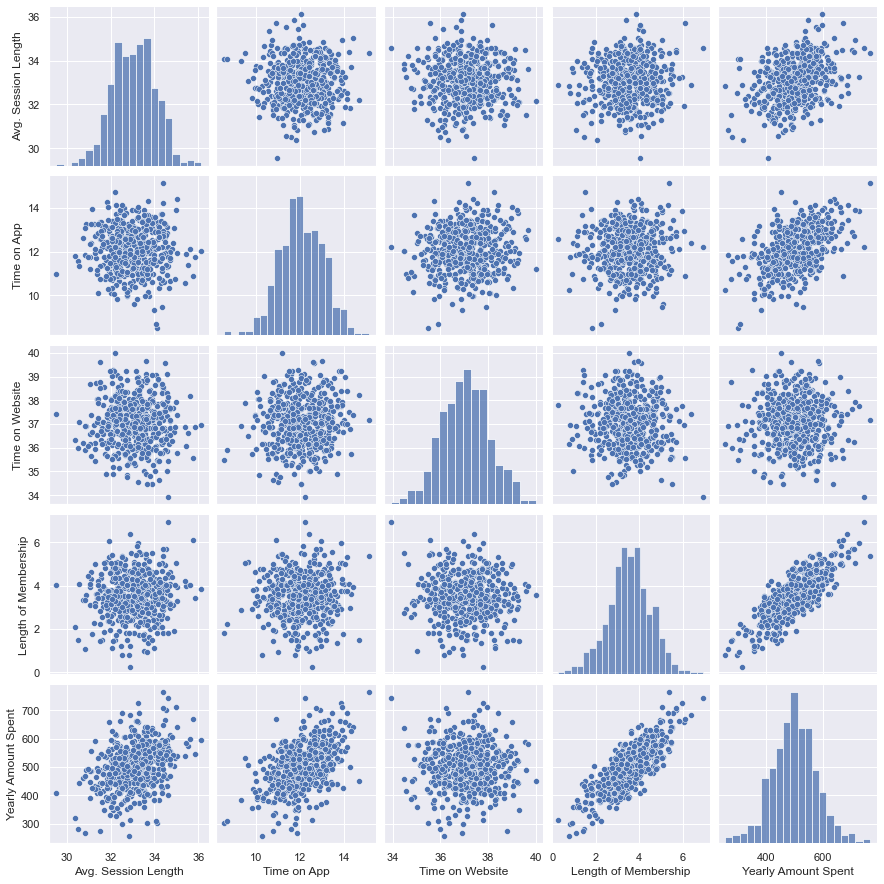

In [14]:
sns.pairplot(customers)

We can focus on some specific variables. For instance, *Time on App* and *Length of Membership* in a jointplot:

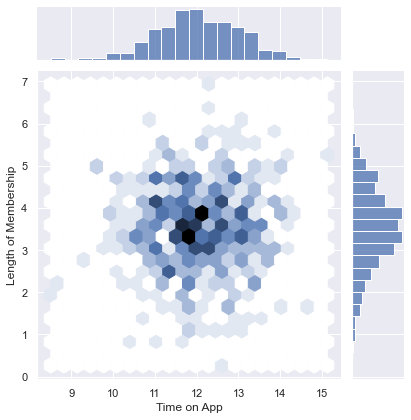

In [16]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

Here is linear plot model between *Lengh of membership* and *Yearly amount spent*:

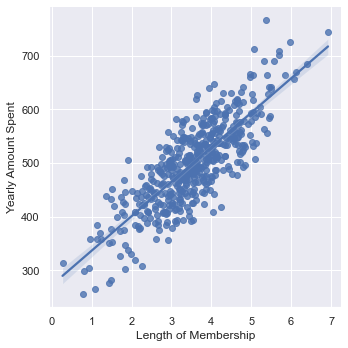

In [15]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

Now let's focus on the two important relationships, how the *Time spent on Website* and the *Time spent on the App* correlate with *Yearly Amount Spent*. 

`Time on Website` with `Yearly Amount Spent`:

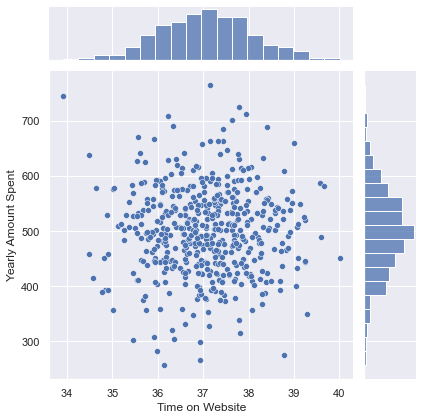

In [17]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

We can observe that data is distributed quite evenly. Now let's check the *Time spent on the App*.

`Time on App` and `Yearly Amount Spent`:

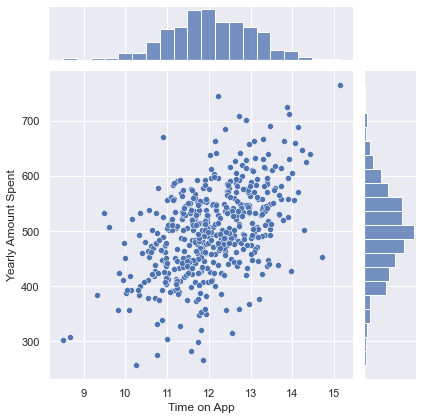

In [30]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

In this case, a tendency starts to be visible. 

Let continue with the creation of the Linear Model.

## Training and testing the model

### Preparing the data
We start by splitting the data between a training and a testing set. For that purpose, we use the `train_test_split()` function from `sklearn`. A `test_size` of 0.3 indicates that 30% of the datapoints will be used for the test set, and the remaining 70% are used for training the model.

In [21]:
# Separate the dataset between independent and dependent variables
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Training
We import `LinearRegression` from `sklearn.linear_model`, create an instance, fit (train) the data, and print out the coefficients of the prediction.

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [26.16165329 38.71786674  0.53559297 61.31589638]


### Predicting test data
Once our model has been trained, let's see how well it fits the data by using the test split of the data and predict its values:

In [27]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

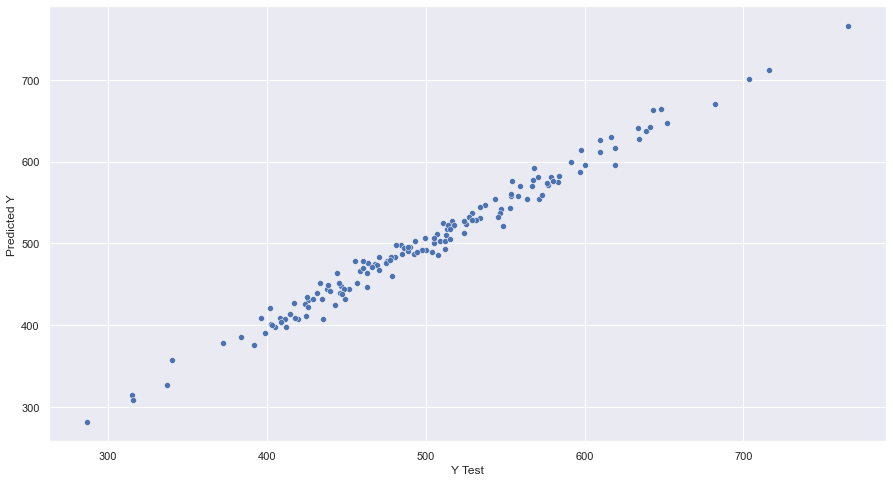

In [28]:
p = sns.scatterplot(y=y_test, x=predictions)
p.set_xlabel("Y Test")
p.set_ylabel("Predicted Y")

#### Evaluating the model
Here we use the `metrics` from `sklearn` to calculate a few measures of how well the model fits the test data. We'll use the **Mean Absolute Error (MAE)**, the **Mean Squared Error (MSE)**, the **Root-mean-square deviation (RMSE)** and the **Explained Variance Score**.

In [39]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Variance:', metrics.explained_variance_score(y_test, predictions))

MAE: 8.26457049526532
MSE: 106.15861899318581
RMSE: 10.303330480635172
Variance: 0.9843368578859192


The MAE is basically the averaged diffence of the absolute error between the actual value and the predicted values. In this case, a MAE Of 8.26 indicates that, on average, the prediction deviates 8.26 USD from the true value.
The RMSE is an similar measure, but penalizes larger errors by squaring them. In this case, the deviation is slightly larger (10.30 USD from the true value).
The Explained Variance Score of 0.98 means that 98% of the variability has been explained. 

Overall, we can see we have a very good model with a very fit model.

### Residuals

Let's also check the residuals, to make sure everything is ok with the model. By plotting an histogram, we see that they distribute quite normally.

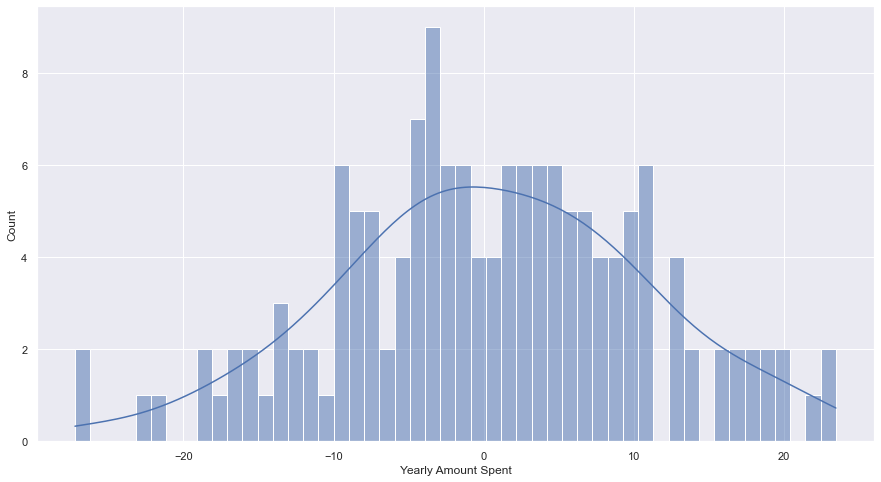

In [33]:
sns.histplot((y_test-predictions),bins=50, kde=True);

## Answering the initial question
App or Website? We'll check the coefficients to observe the weight of each variable on the amount of money spent on the platform.

In [40]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coeffecient']
coefficients

,Coeffecient
Avg. Session Length,26.161653
Time on App,38.717867
Time on Website,0.535593
Length of Membership,61.315896


We see that for every minute in `Time on App` implies an increase of **38.71 USD** spent, while the same increase in `Time on Website` means an increase of **0.53 USD**.

The difference between the two variables is clear. Users who spend time browsing the store in the App are much more likely to spend money on the platform, whereas those who browse the Website for the same amount of time barely end up spending. 
Now we have a fully informed background for making a decision. On one hand, the company could focus on the App since the Website is negligible in comparison, but on the other hand, that could mean that improving the Website usability could have a greater potential to attract future sales.